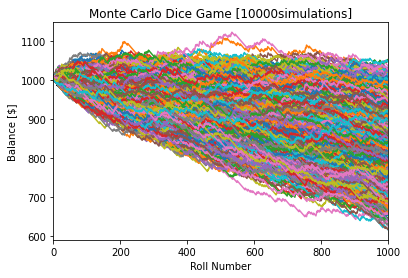

Average win probability after 10000runs: 0.1664656999999995
Average ending balance after 10000runs: $832.3285


In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np


# Создаем функцию броска кубика
def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)

    # Определим является ли значение на костях одинаковым
    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num


# Входные данные
num_simulations = 10000
max_num_rolls = 1000
bet = 1

# Отслеживаемые переменные
win_probability = []
end_balance = []

# Создание фигуры, для симуляции баланса
fig = plt.figure()
plt.title("Monte Carlo Dice Game [" + str(num_simulations) + "simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])


# Цикл for запускает желаемое количество симуляций
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0
    # Выполняется до тех пор пока игрок не выкинет 1000 раз
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        # Результат если кости одинаковые
        if same:
            balance.append(balance[-1] + 4 * bet)
            num_wins += 1
        # Результат если кости разные
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)
    # Сохраняем отслеживаемую переменную и добавляем строку к рисунку
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)


# Выведем график после завершения моделирования
plt.show()

# Усредненная вероятность выигрыша и конечного баланса
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
# Вывод средних значений
print("Average win probability after " + str(num_simulations) + "runs: " + str(overall_win_probability))
print("Average ending balance after " + str(num_simulations) + "runs: $" + str(overall_end_balance))
